In [1]:
#import dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Establish CSV path for relevant files
csv_path1 = "../Player Historical Trade Tweets/MarshawnLynch_Trans_1.csv"
csv_path2 = "../Player Historical Trade Tweets/MarshawnLynch_Trans_2.csv"
csv_path3 = "../Player Historical Trade Tweets/MarshawnLynch_Trans_3.csv"
csv_path4 = "../Player Historical Trade Tweets/MarshawnLynch_Trans_4.csv"

#Establish pd dataframe for each file
marshawnlynch1 = pd.read_csv(csv_path1, sep=";", error_bad_lines=False)
marshawnlynch2 = pd.read_csv(csv_path2, sep=";", error_bad_lines=False)
marshawnlynch3 = pd.read_csv(csv_path3, sep=";")
marshawnlynch4 = pd.read_csv(csv_path4, sep=";")

#concatenate data frames 
marshawnlynch_master = pd.concat([marshawnlynch1, marshawnlynch2, marshawnlynch3, marshawnlynch4])
marshawnlynch_master

b'Skipping line 9637: expected 10 fields, saw 11\nSkipping line 9638: expected 10 fields, saw 11\nSkipping line 9639: expected 10 fields, saw 11\nSkipping line 9640: expected 10 fields, saw 11\nSkipping line 9641: expected 10 fields, saw 11\nSkipping line 9643: expected 10 fields, saw 11\nSkipping line 9644: expected 10 fields, saw 11\nSkipping line 9645: expected 10 fields, saw 11\nSkipping line 9646: expected 10 fields, saw 11\nSkipping line 9647: expected 10 fields, saw 11\nSkipping line 9648: expected 10 fields, saw 11\nSkipping line 9649: expected 10 fields, saw 11\nSkipping line 9650: expected 10 fields, saw 11\nSkipping line 9651: expected 10 fields, saw 11\nSkipping line 9653: expected 10 fields, saw 11\nSkipping line 9654: expected 10 fields, saw 11\nSkipping line 9655: expected 10 fields, saw 11\nSkipping line 9656: expected 10 fields, saw 11\nSkipping line 9657: expected 10 fields, saw 11\nSkipping line 9658: expected 10 fields, saw 11\nSkipping line 9659: expected 10 fields

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2017-05-02 18:58,22,10,"First peek at Raiders’ Marshawn Lynch, Derek C...",NaN,NaN,NaN,8.595578e+17,https://twitter.com/WillReeveJr/status/8595578...
1,NaN,2017-05-02 18:58,22,10,"First peek at Raiders’ Marshawn Lynch, Derek C...",NaN,NaN,NaN,8.595578e+17,https://twitter.com/WillReeveJr/status/8595578...
2,NaN,2017-05-02 18:58,0,1,"First peek at Raiders’ Marshawn Lynch, Derek C...",NaN,NaN,NaN,8.595578e+17,https://twitter.com/TheRaidersWire/status/8595...
3,NaN,2017-05-02 18:58,1,1,VIDEO: Marshawn Lynch tiene su primera práctic...,NaN,@,#,8.595578e+17,https://twitter.com/mmdeportesmx/status/859557...
4,NaN,2017-05-02 18:56,0,0,it's jordan peele's imitation of marshawn lynch,NaN,NaN,NaN,8.595573e+17,https://twitter.com/CFromBothell/status/859557...
5,NaN,2017-05-02 18:53,0,0,Marshawn Lynch joins Raiders offseason program...,NaN,NaN,NaN,8.595565e+17,https://twitter.com/Premku1/status/85955650355...
6,NaN,2017-05-02 18:51,0,3,Marshawn Lynch joins Raiders offseason program...,NaN,NaN,NaN,8.595559e+17,https://twitter.com/NFLDailyPost/status/859555...
7,NaN,2017-05-02 18:46,0,0,Check out Marshawn Lynch at Raiders practice f...,NaN,NaN,NaN,8.595548e+17,https://twitter.com/LovesWaterViews/status/859...
8,NaN,2017-05-02 18:46,0,0,Marshawn Lynch joins Raiders offseason program...,NaN,NaN,# #,8.595546e+17,https://twitter.com/WishFeeder/status/85955462...
9,NaN,2017-05-02 18:40,0,0,** Financial details of Marshawn Lynch's contr...,NaN,NaN,NaN,8.595532e+17,https://twitter.com/TruthfulTalk/status/859553...


In [2]:
#fillna's with text to fix error
marshawnlynch_master["text"].fillna("text", inplace=True)
marshawnlynch_master.head()


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2017-05-02 18:58,22,10,"First peek at Raiders’ Marshawn Lynch, Derek C...",NaN,NaN,NaN,8.595578e+17,https://twitter.com/WillReeveJr/status/8595578...
1,NaN,2017-05-02 18:58,22,10,"First peek at Raiders’ Marshawn Lynch, Derek C...",NaN,NaN,NaN,8.595578e+17,https://twitter.com/WillReeveJr/status/8595578...
2,NaN,2017-05-02 18:58,0,1,"First peek at Raiders’ Marshawn Lynch, Derek C...",NaN,NaN,NaN,8.595578e+17,https://twitter.com/TheRaidersWire/status/8595...
3,NaN,2017-05-02 18:58,1,1,VIDEO: Marshawn Lynch tiene su primera práctic...,NaN,@,#,8.595578e+17,https://twitter.com/mmdeportesmx/status/859557...
4,NaN,2017-05-02 18:56,0,0,it's jordan peele's imitation of marshawn lynch,NaN,NaN,NaN,8.595573e+17,https://twitter.com/CFromBothell/status/859557...


In [3]:
#create list of sentiment scores associated with tweets about relevant player

marshawnlynch_sent = []

tweets = marshawnlynch_master["text"]

for index,tweet in marshawnlynch_master.iterrows():
    results = analyzer.polarity_scores(tweet["text"])
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
        
    # Add sentiments for each tweet into an array
    marshawnlynch_sent.append({"date": tweet["date"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg})
marshawnlynch_sent



[{'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2017-05-02 18:58'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2017-05-02 18:58'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2017-05-02 18:58'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2017-05-02 18:58'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2017-05-02 18:56'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2017-05-02 18:53'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2017-05-02 18:51'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2017-05-02 18:46'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2017-05-02 18:46'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutr

In [4]:
# Convert player sentiments to DataFrame
ML_pd = pd.DataFrame.from_dict(marshawnlynch_sent)
ML_pd.head()

,Compound,Negative,Neutral,Positive,date
0,0.0,1.0,0.0,0.0,2017-05-02 18:58
1,0.0,1.0,0.0,0.0,2017-05-02 18:58
2,0.0,1.0,0.0,0.0,2017-05-02 18:58
3,0.0,1.0,0.0,0.0,2017-05-02 18:58
4,0.0,1.0,0.0,0.0,2017-05-02 18:56


In [5]:
# merge sentiment data frame and master player tweet file

merged = pd.merge(marshawnlynch_master, ML_pd, on="date", how="outer")
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive
0,NaN,2017-05-02 18:58,22,10,"First peek at Raiders’ Marshawn Lynch, Derek C...",NaN,NaN,NaN,8.595578e+17,https://twitter.com/WillReeveJr/status/8595578...,0.0,1.0,0.0,0.0
1,NaN,2017-05-02 18:58,22,10,"First peek at Raiders’ Marshawn Lynch, Derek C...",NaN,NaN,NaN,8.595578e+17,https://twitter.com/WillReeveJr/status/8595578...,0.0,1.0,0.0,0.0
2,NaN,2017-05-02 18:58,22,10,"First peek at Raiders’ Marshawn Lynch, Derek C...",NaN,NaN,NaN,8.595578e+17,https://twitter.com/WillReeveJr/status/8595578...,0.0,1.0,0.0,0.0
3,NaN,2017-05-02 18:58,22,10,"First peek at Raiders’ Marshawn Lynch, Derek C...",NaN,NaN,NaN,8.595578e+17,https://twitter.com/WillReeveJr/status/8595578...,0.0,1.0,0.0,0.0
4,NaN,2017-05-02 18:58,22,10,"First peek at Raiders’ Marshawn Lynch, Derek C...",NaN,NaN,NaN,8.595578e+17,https://twitter.com/WillReeveJr/status/8595578...,0.0,1.0,0.0,0.0


In [6]:
# remove time from datetime to be able to groupby an individual day
pd.DatetimeIndex(merged.date).normalize()
merged['date_new'] = pd.DatetimeIndex(merged.date).normalize()
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new
0,NaN,2017-05-02 18:58,22,10,"First peek at Raiders’ Marshawn Lynch, Derek C...",NaN,NaN,NaN,8.595578e+17,https://twitter.com/WillReeveJr/status/8595578...,0.0,1.0,0.0,0.0,2017-05-02
1,NaN,2017-05-02 18:58,22,10,"First peek at Raiders’ Marshawn Lynch, Derek C...",NaN,NaN,NaN,8.595578e+17,https://twitter.com/WillReeveJr/status/8595578...,0.0,1.0,0.0,0.0,2017-05-02
2,NaN,2017-05-02 18:58,22,10,"First peek at Raiders’ Marshawn Lynch, Derek C...",NaN,NaN,NaN,8.595578e+17,https://twitter.com/WillReeveJr/status/8595578...,0.0,1.0,0.0,0.0,2017-05-02
3,NaN,2017-05-02 18:58,22,10,"First peek at Raiders’ Marshawn Lynch, Derek C...",NaN,NaN,NaN,8.595578e+17,https://twitter.com/WillReeveJr/status/8595578...,0.0,1.0,0.0,0.0,2017-05-02
4,NaN,2017-05-02 18:58,22,10,"First peek at Raiders’ Marshawn Lynch, Derek C...",NaN,NaN,NaN,8.595578e+17,https://twitter.com/WillReeveJr/status/8595578...,0.0,1.0,0.0,0.0,2017-05-02


In [8]:
merged["date_string"] = merged["date_new"].dt.strftime('%Y-%m-%d')
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new,date_string
0,NaN,2017-05-02 18:58,22,10,"First peek at Raiders’ Marshawn Lynch, Derek C...",NaN,NaN,NaN,8.595578e+17,https://twitter.com/WillReeveJr/status/8595578...,0.0,1.0,0.0,0.0,2017-05-02,2017-05-02
1,NaN,2017-05-02 18:58,22,10,"First peek at Raiders’ Marshawn Lynch, Derek C...",NaN,NaN,NaN,8.595578e+17,https://twitter.com/WillReeveJr/status/8595578...,0.0,1.0,0.0,0.0,2017-05-02,2017-05-02
2,NaN,2017-05-02 18:58,22,10,"First peek at Raiders’ Marshawn Lynch, Derek C...",NaN,NaN,NaN,8.595578e+17,https://twitter.com/WillReeveJr/status/8595578...,0.0,1.0,0.0,0.0,2017-05-02,2017-05-02
3,NaN,2017-05-02 18:58,22,10,"First peek at Raiders’ Marshawn Lynch, Derek C...",NaN,NaN,NaN,8.595578e+17,https://twitter.com/WillReeveJr/status/8595578...,0.0,1.0,0.0,0.0,2017-05-02,2017-05-02
4,NaN,2017-05-02 18:58,22,10,"First peek at Raiders’ Marshawn Lynch, Derek C...",NaN,NaN,NaN,8.595578e+17,https://twitter.com/WillReeveJr/status/8595578...,0.0,1.0,0.0,0.0,2017-05-02,2017-05-02


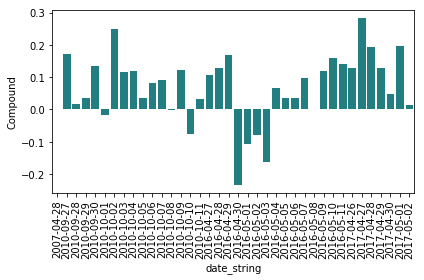

In [9]:
#plot groupby *x axis = day, y axis = compound sentiment score*
grouped = merged.groupby('date_string').mean().reset_index()
grouped.sort_values("date_string", ascending = True, inplace = True)
grouped.head()
sns.barplot(x = grouped["date_string"], y = grouped["Compound"], color = "#138D91")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('marshawnlynch.png')
plt.show()
